<a href="https://colab.research.google.com/github/CarolineVicente/Machine_Learn/blob/main/temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


Leitura dos dados

In [2]:
passageiros = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv')
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


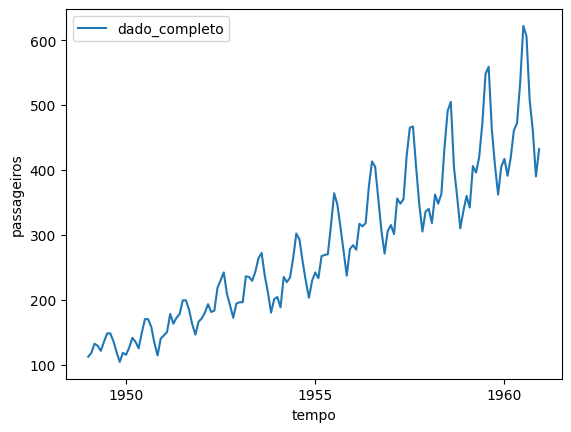

In [3]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros,label='dado_completo')

mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

Pré-processamento - Escalando os dados

In [4]:
sc = StandardScaler()
sc.fit(passageiros)

dado_escalado = sc.transform(passageiros)
x = dado_escalado[:,0]
y = dado_escalado[:,1]

Text(0.5, 0, 'data')

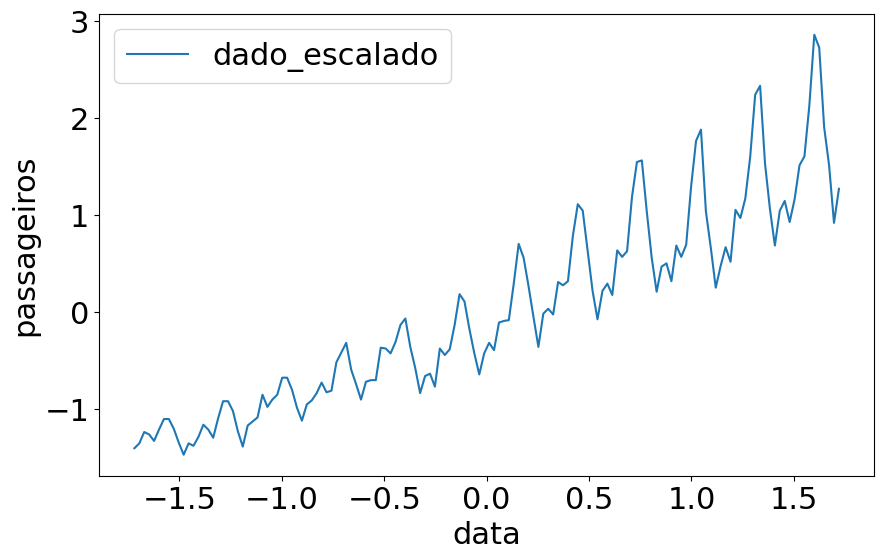

In [5]:
sns.lineplot(x=x, y=y, label='dado_escalado')
plt.ylabel('passageiros')
plt.xlabel('data')

Dados de treino e teste

In [6]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [7]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [8]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

<Axes: >

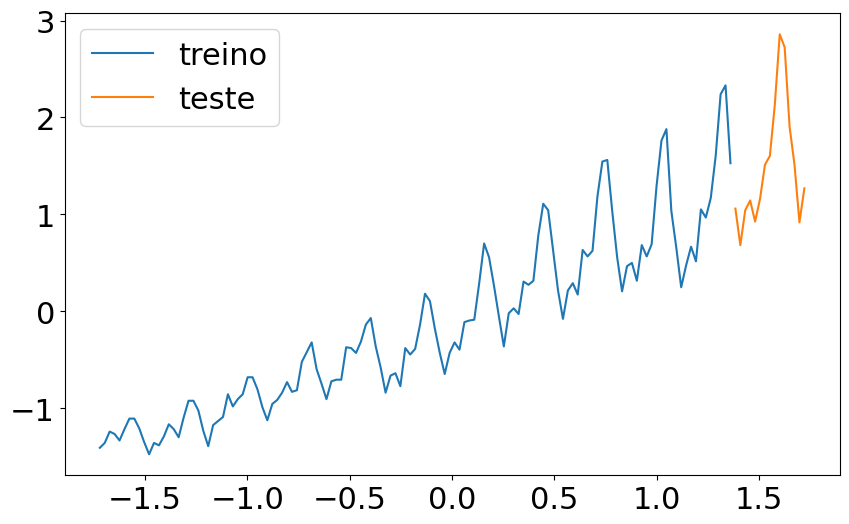

In [9]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')

Regressão

In [10]:
regressor = Sequential()
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones',
                    activation='linear',use_bias=False))
regressor.compile(loss='mean_squared_error',  optimizer='adam')
regressor.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               1 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1 (4.00 B)

 Trainable params: 1 (4.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
regressor.fit(xtreino, ytreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1349


In [12]:
y_predict= regressor.predict(xtreino) #Prevendo os dados de treino (o ajuste)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


<Axes: >

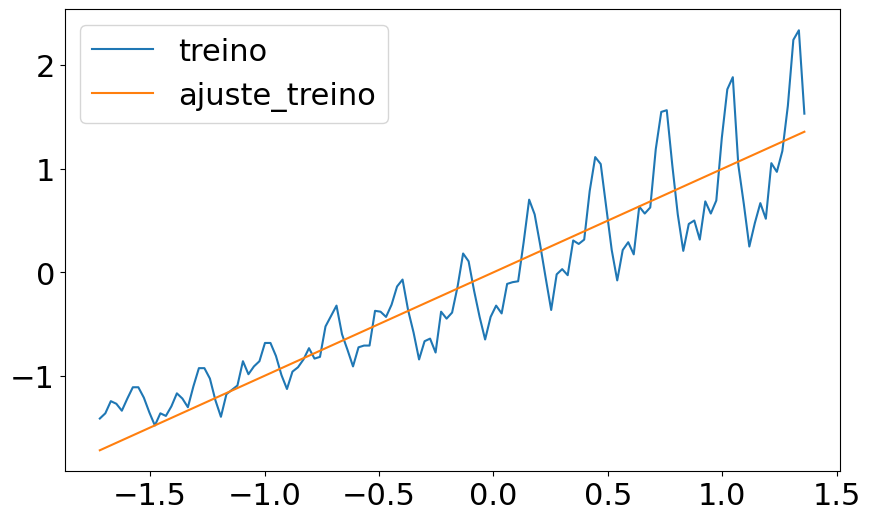

In [13]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')

Mudando a escala

In [14]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(data=d)

In [15]:
resultado_transf = sc.inverse_transform(resultados)

In [16]:
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo','passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

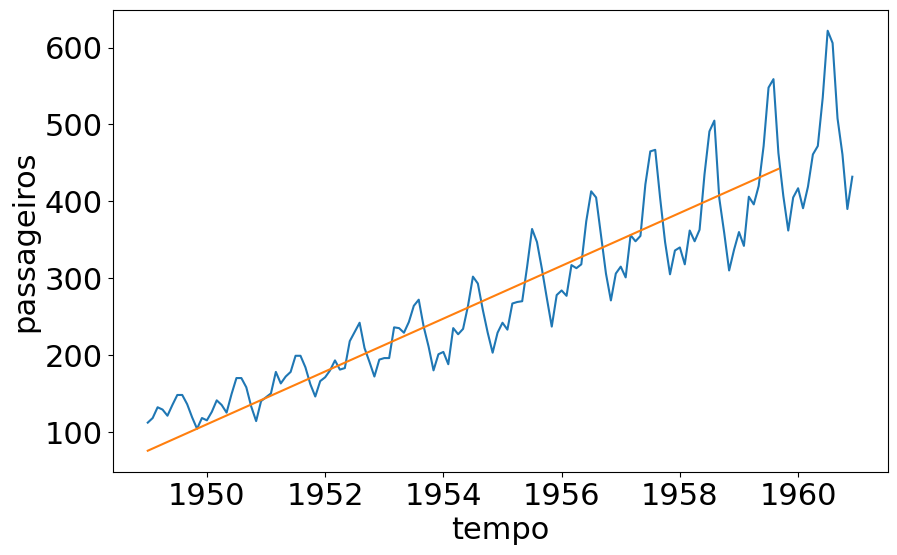

In [17]:
sns.lineplot(x="tempo",y="passageiros",data=passageiros)
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf)

In [18]:
y_predict_teste= regressor.predict(xteste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


In [19]:
d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

In [20]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo','passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

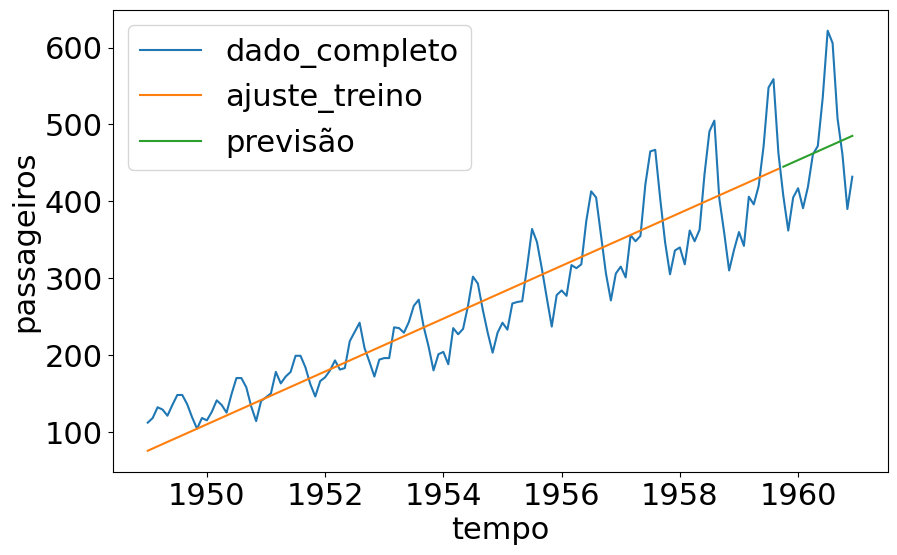

In [21]:
sns.lineplot(x="tempo",y="passageiros",data=passageiros,label='dado_completo')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf,label='ajuste_treino')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf_teste,label='previsão')


Adicionando camadas

In [22]:
regressor2 = Sequential()
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform',
                     activation='sigmoid',use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform',
                     activation='sigmoid',use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform',
                     activation='linear',use_bias=False))
regressor2.compile(loss='mean_squared_error',  optimizer='adam')
regressor2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 8)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
regressor2.fit(xtreino,ytreino,epochs =500)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.8206
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7747 
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.7801 
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7739 
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8136
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8032 
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8280 
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.7557
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8315  
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7707 
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8192  
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7751 
Epoch 13/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7869  
Epoch 14/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7576 
Epoch 15/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7546 
Epoch 16/5

In [24]:
y_predict= regressor2.predict(xtreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [25]:
y_predict_teste= regressor2.predict(xteste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


<Axes: >

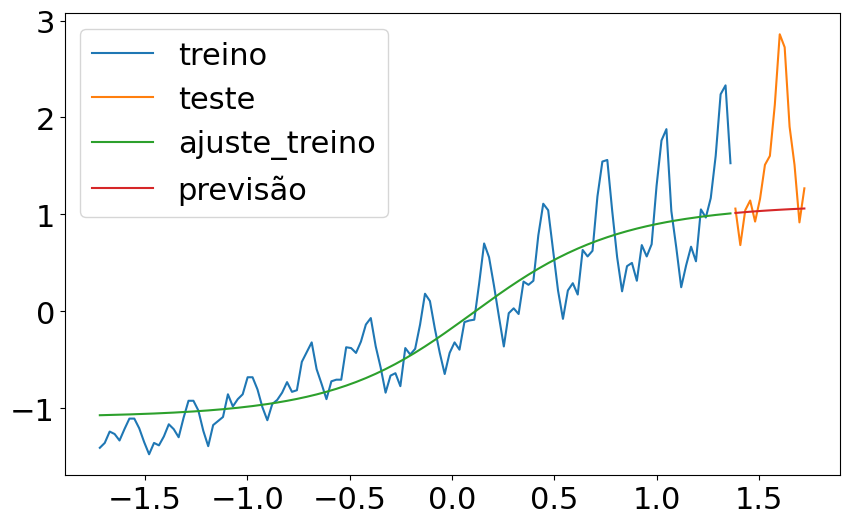

In [26]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0],label='previsão')

Alterando os dados

In [27]:
vetor = pd.DataFrame(ytreino)[0]

In [28]:
def separa_dados(vetor,n_passos):
  """Entrada: vetor: número de passageiros
               n_passos: número de passos no regressor
     Saída:
              X_novo: Array 2D
              y_novo: Array 1D - Nosso alvo
  """
  X_novo, y_novo = [], []
  for i in range(n_passos,vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo

In [29]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [30]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [31]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [32]:
vetor2 = pd.DataFrame(yteste)[0]
xteste_novo, yteste_novo = separa_dados(vetor2,1)

In [33]:
regressor3 =  Sequential()

In [34]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear',use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor3.compile(loss='mean_squared_error',optimizer='adam')
regressor3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 8)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              64 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 584 (2.28 KB)

 Trainable params: 584 (2.28 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
regressor3.fit(xtreino_novo,ytreino_novo,epochs =100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7560  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7875 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7502 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7015 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6720 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6442 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5683 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6376 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5816
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5637 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4851 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5057 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4730 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4663 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4118
Epoch 16/100
4/4 

In [36]:
y_predict_novo = regressor3.predict(xtreino_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


<Axes: xlabel='tempo', ylabel='0'>

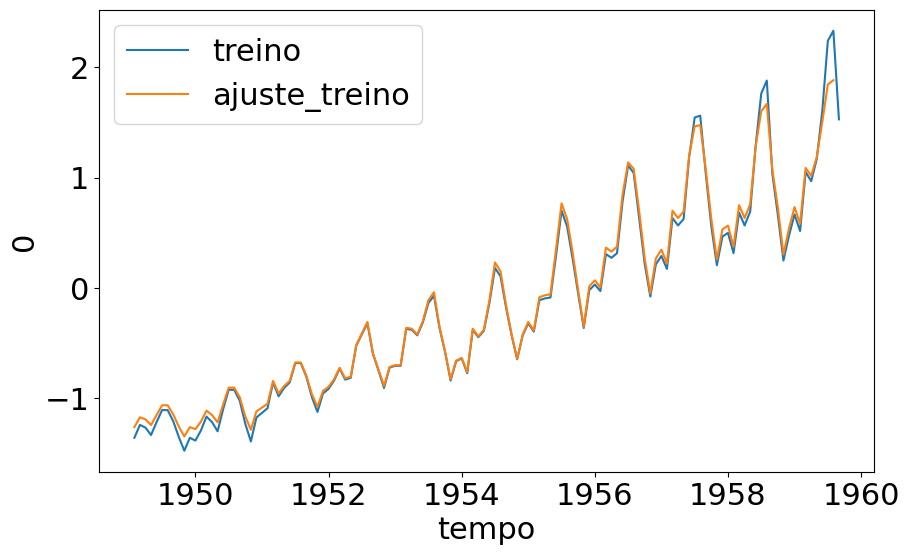

In [37]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

In [38]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [39]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo', ylabel='0'>

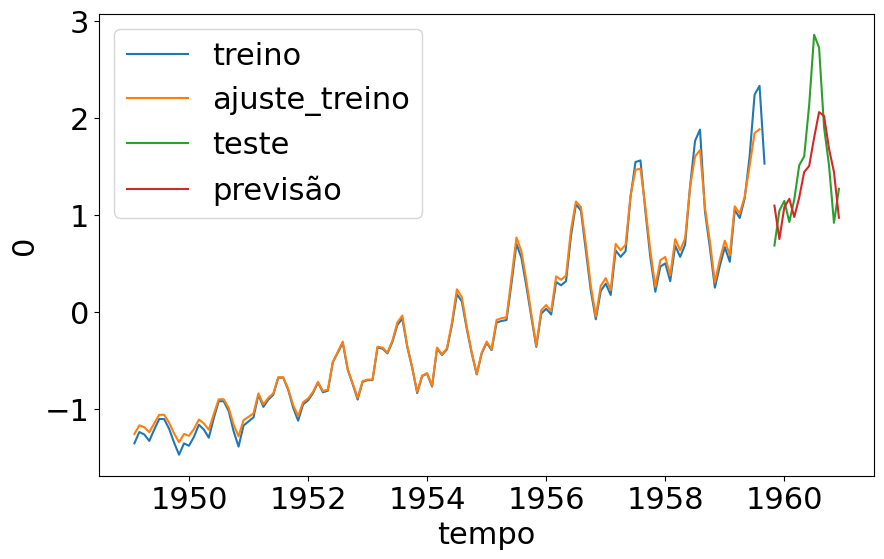

In [40]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[130:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[130:144],label='previsão')

In [41]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

In [42]:
xtreino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [43]:
ytreino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [44]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [45]:
regressor4 =  Sequential()

In [46]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='random_uniform', activation='linear',use_bias=False)) #relu
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False)) #relu
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor4.compile(loss='mean_squared_error',optimizer='adam')
regressor4.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 8)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              64 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 608 (2.38 KB)

 Trainable params: 608 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
regressor4.fit(xtreino_novo, ytreino_novo, epochs=300)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.8130 
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8065
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8242
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7360 
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6353
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7457
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8232
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7793
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8219
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8020
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8140
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7323 
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7395
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7155
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6918
Epoch 16/300
4/4 

In [48]:
y_predict_novo = regressor4.predict(xtreino_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [49]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [50]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [51]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo', ylabel='0'>

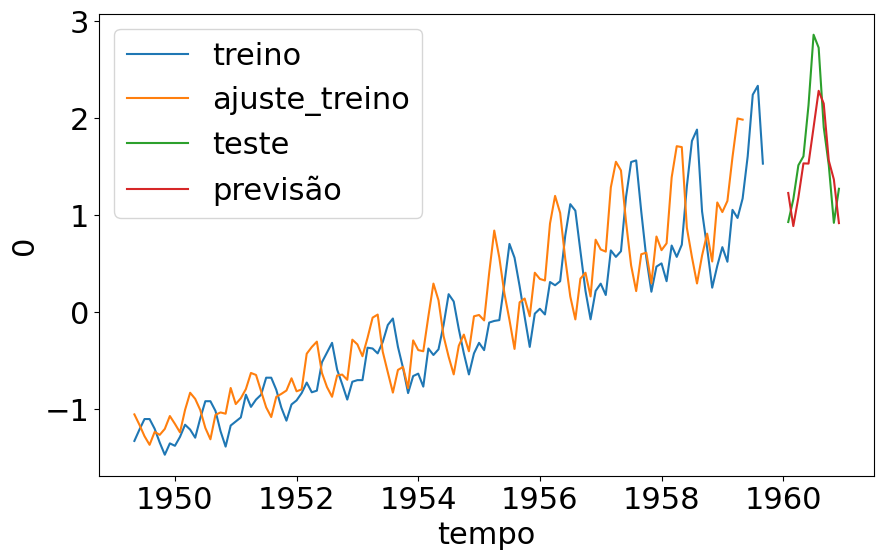

In [52]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[4:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[133:144],label='previsão')


In [53]:
bike = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/refs/heads/aula4/bicicletas.csv')

In [54]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [55]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

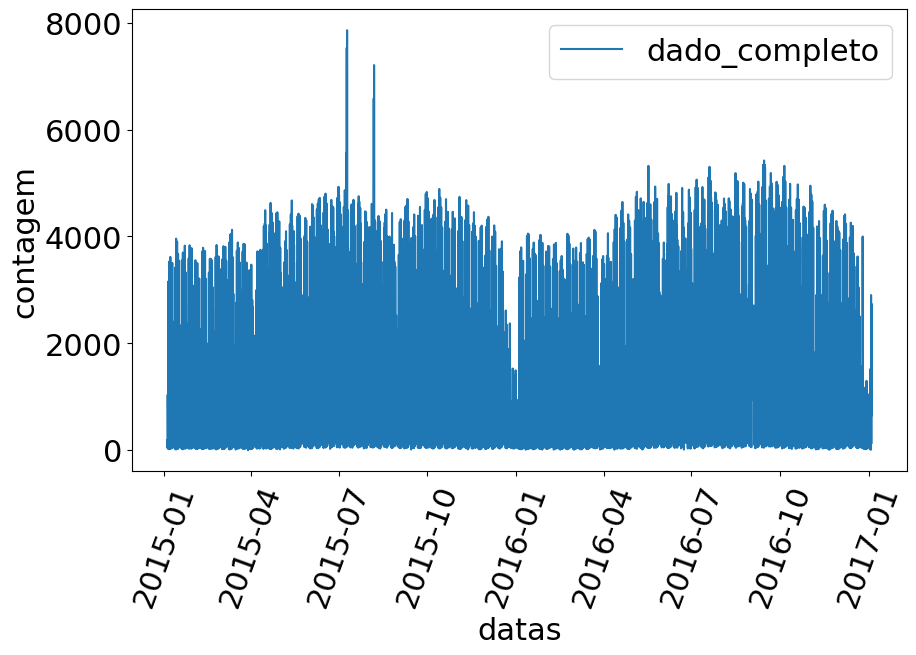

In [56]:
sns.lineplot(x='datas', y='contagem', data=bike, label='dado_completo')
plt.xticks(rotation=70)

In [57]:
sc2 = StandardScaler()
bike_sc = sc2.fit(bike['contagem'].values.reshape(-1, 1))

In [58]:
y = sc2.transform(bike['contagem'].values.reshape(-1, 1))

In [59]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino

In [60]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

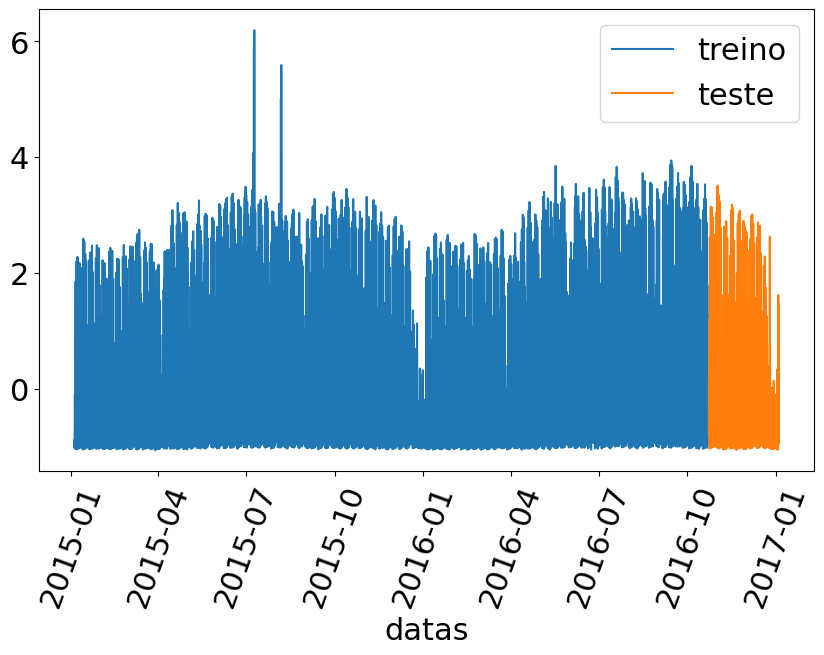

In [61]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
plt.xticks(rotation=70)

In [62]:
vetor = pd.DataFrame(ytreino)[0]

In [63]:
xtreino_novo, ytreino_novo = separa_dados(vetor,10)

In [64]:
xtreino_novo[0:5]

array([[-0.88574518, -0.9262953 , -0.92998167, -0.98712048, -1.01016032,
        -1.01108192, -1.00647395, -0.9843557 , -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, -1.01016032, -1.01108192,
        -1.00647395, -0.9843557 , -0.93274645, -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, -1.01108192, -1.00647395,
        -0.9843557 , -0.93274645, -0.77607553, -0.56687377, -0.38347663],
       [-0.98712048, -1.01016032, -1.01108192, -1.00647395, -0.9843557 ,
        -0.93274645, -0.77607553, -0.56687377, -0.38347663, -0.25906149],
       [-1.01016032, -1.01108192, -1.00647395, -0.9843557 , -0.93274645,
        -0.77607553, -0.56687377, -0.38347663, -0.25906149, -0.20929543]])

In [65]:
ytreino_novo[0:5]

array([-0.56687377, -0.38347663, -0.25906149, -0.20929543, -0.09593941])

In [66]:
vetor2 = pd.DataFrame(yteste)[0]

In [67]:
xteste_novo, yteste_novo = separa_dados(vetor2,10)

In [68]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1],1))
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

In [69]:
recorrente = Sequential()

In [70]:
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente.add(Dense(units=1))
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')
recorrente.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
resultado = recorrente.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.4714 - val_loss: 0.0759
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.1024 - val_loss: 0.0380
Epoch 3/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0625 - val_loss: 0.0300
Epoch 4/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0491 - val_loss: 0.0296
Epoch 5/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0451 - val_loss: 0.0300
Epoch 6/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0435 - val_loss: 0.0295
Epoch 7/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0414 - val_loss: 0.0232
Epoch 8/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.0341 - val_loss: 0.0255
Epoch 9/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0338 - val_loss: 0.0301
Epoch 10/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0385 - val_loss: 0.0204
Epoch 11/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0311 - val_loss: 0.0260
Epoch 12/100
490/490 ━━━

In [72]:
y_ajustado = recorrente.predict(xtreino_novo)

490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

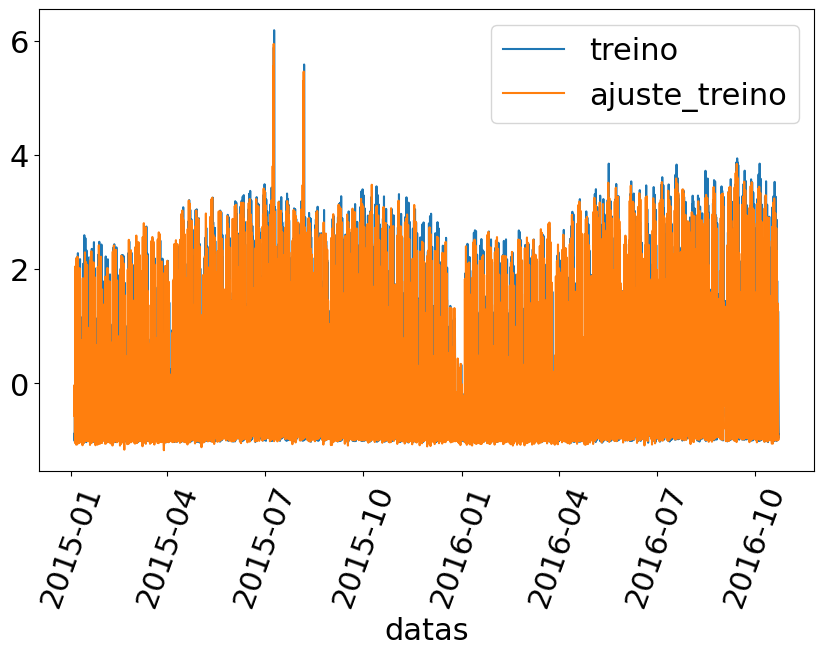

In [73]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')
plt.xticks(rotation=70)

In [74]:
y_predito = recorrente.predict(xteste_novo)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

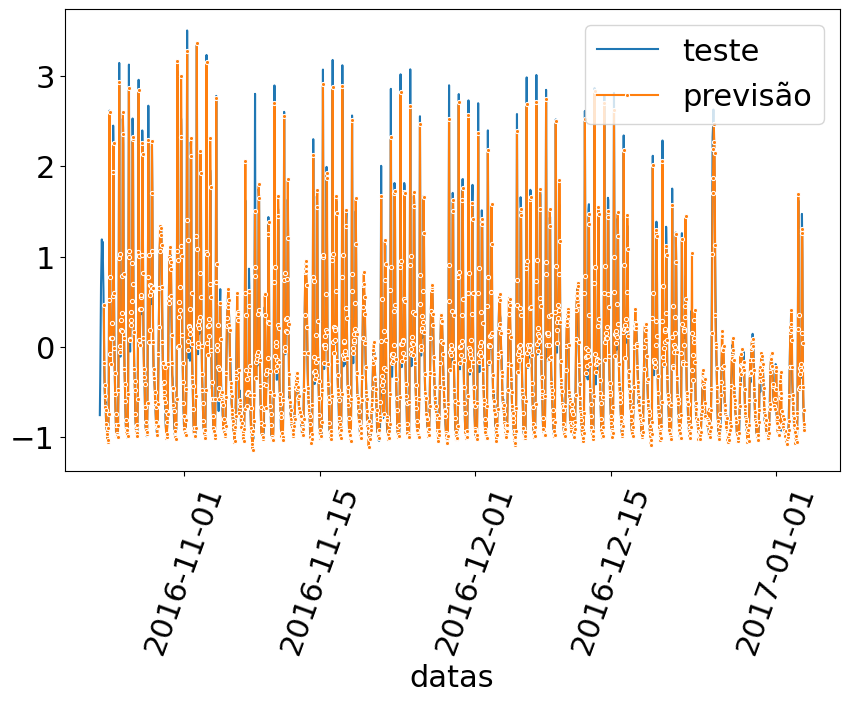

In [75]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.',label='previsão')
plt.xticks(rotation=70)

In [76]:
recorrente_g = Sequential()
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente_g.add(Dense(units=1))
recorrente_g.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente_g.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 128)                 │          50,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,433 (197.00 KB)

 Trainable params: 50,433 (197.00 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
resultado2 = recorrente_g.fit(xtreino_novo,ytreino_novo,
                              validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.3766 - val_loss: 0.0753
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0834 - val_loss: 0.0387
Epoch 3/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0575 - val_loss: 0.0394
Epoch 4/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0510 - val_loss: 0.0252
Epoch 5/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0403 - val_loss: 0.0218
Epoch 6/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0362 - val_loss: 0.0203
Epoch 7/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0387 - val_loss: 0.0222
Epoch 8/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0332 - val_loss: 0.0183
Epoch 9/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0303 - val_loss: 0.0210
Epoch 10/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0306 - val_loss: 0.0222
Epoch 11/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0366 - val_loss: 0.0183
Epoch 12/100
490/490 ━━

In [78]:
y_predito2 = recorrente_g.predict(xteste_novo)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

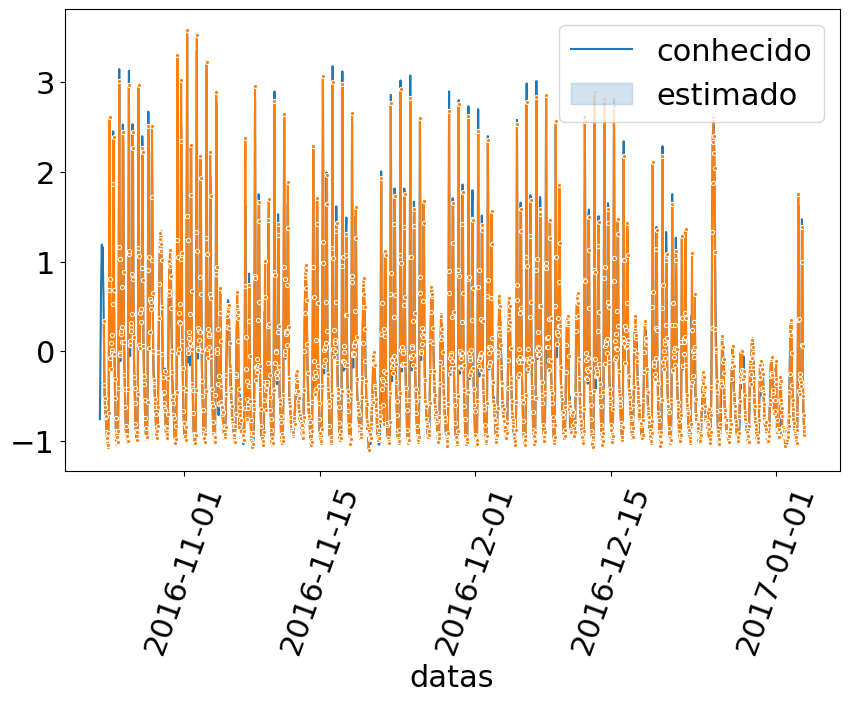

In [79]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)])
sns.lineplot(x='datas',y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.')
plt.legend(['conhecido','estimado'])
plt.xticks(rotation=70)

In [80]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


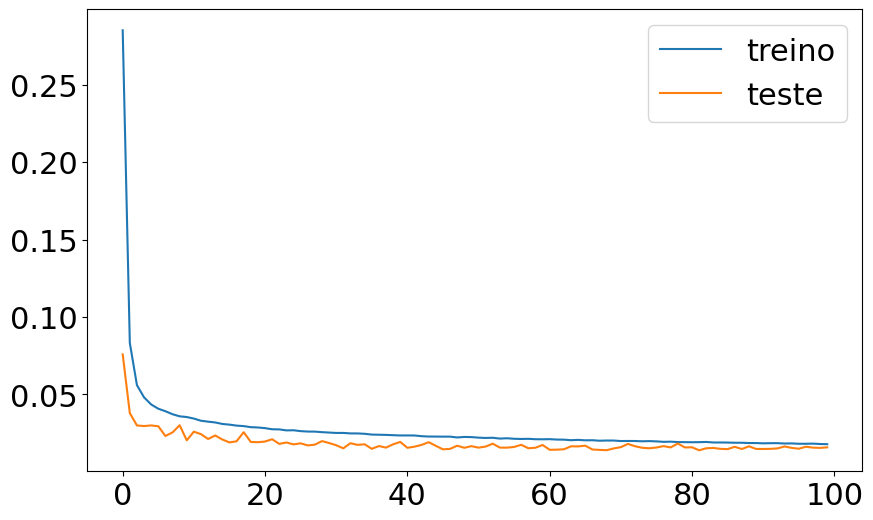

In [81]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])

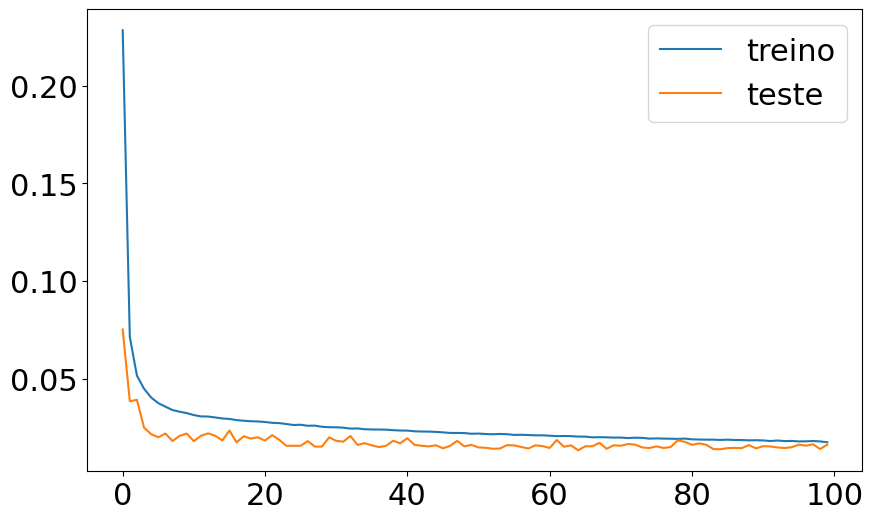

In [82]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])
